Review of Statistics

- For two continous random variables we use Pearson Correlation Coefficient
- It is essentially the covariance of two variables divided by the product of their standard deviations
- The value of the Pearson Correlation Coefficient is between -1 and 1
- cov(X, Y) = E[(X - E[X])(Y - E[Y])] = E[XY] - E[X]E[Y]
- eg, house prices and square footage


In [1]:
import numpy as np
from scipy.stats import pearsonr

y_true = np.array([3.0, 2.5, 4.0, 5.0])
y_pred = np.array([2.8, 2.7, 3.9, 5.1])

r, _ = pearsonr(y_true, y_pred)
print(f"Pearson correlation coefficient: {r:.3f}")

Pearson correlation coefficient: 0.987


Many discrete rvs are just labels, eg,rbg os 012, pearson r mistakes label codes for numeric meaning.

For one continous, and one discrete case we use the point-biserial correlation if discrete is binary(0/1)

Use ANOVA or box plots if discrete has more than two categories
- income vs gender


In [2]:
from scipy.stats import pointbiserialr

income = np.array([50000, 60000, 52000, 58000, 62000])
gender = np.array([0, 1, 0, 1, 1])

r, _ = pointbiserialr(gender, income)
print(f"Point-biserial r = {r:.2f}")


Point-biserial r = 0.95


For both discrete case, pearson is not ideal. We instead use spearman rank correlation or cramer's v for categorical variables.

We usually use chi squared test of independent
Cramer's V is based on chi-squared

When dealing with one continous, one discrete, we use point-biserial correlation if discrete is binary (0/1).
Analysis of variance (ANOVA) or box plots are used if the discrete variable has more than two categories.


[watch on the test, watch the video on the dist by same guy](https://www.youtube.com/watch?v=NTHA9Qa81R8)

In [ ]:
import scipy.stats as stats
import pandas as pd

data = [[20,15], [30,35]]
df = pd.DataFrame(data, columns=['Likes A', 'Likes B'], index=['Male', 'Female'])

chi2, p, dof, expected = stats.chi2_contingency(df)

print(f"Chi-squared statistic = {chi2}")
print(f"p-value = {p}")
print(f"Degrees of freedom = {dof}")
print("Expected frequencies:")
print(expected)

# based on teh chi2 value you can decide to reject or accept hte null hypothesis

Chi-squared statistic = 0.7032967032967032
p-value = 0.4016781664697727
Degrees of freedom = 1
Expected frequencies:
[[17.5 17.5]
 [32.5 32.5]]


In [4]:
# goodness of fit test
import scipy.stats as stats

# Observed frequencies for die faces 1-6
observed = [10, 8, 9, 11, 12, 10]

expected = [10] * 6 

chi2, p = stats.chisquare(f_obs=observed, f_exp=expected)

print(f"Chi-squared statistic = {chi2}")
print(f"p-value = {p}")


Chi-squared statistic = 1.0
p-value = 0.9625657732472964


if p<0.05 -> reject the null hypothesis, variables are not independent, observed is not equal to the expected

if p>=0.05 -> fail to reject the null, no significant difference, data fits expected

Anova is an extension of the t-test, when you have more than two groups

[t test](https://www.youtube.com/watch?v=VekJxtk4BYM)

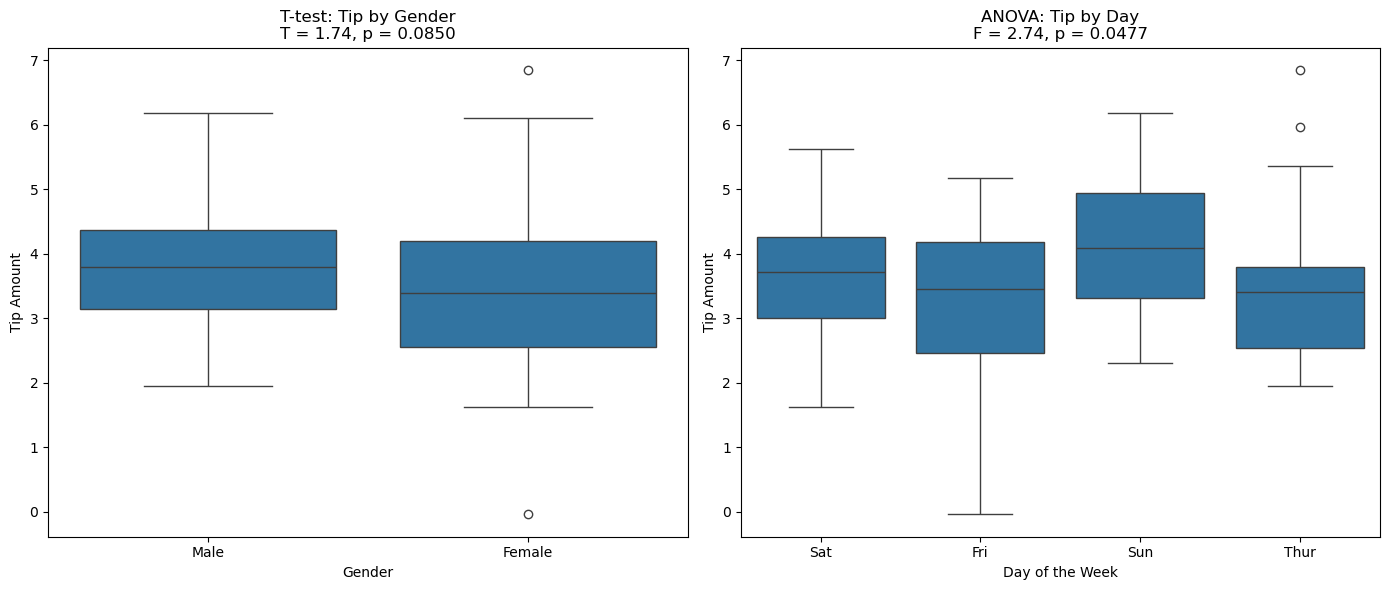

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

np.random.seed(42)

n = 100
data = pd.DataFrame({
    "sex": np.random.choice(["Male", "Female"], size=n),
    "day": np.random.choice(["Thur", "Fri", "Sat", "Sun"], size=n),
})

# Tip depends slightly on gender and day
data["tip"] = (
    np.where(data["sex"] == "Male", np.random.normal(3.5, 1.0, size=n), np.random.normal(3.0, 1.0, size=n)) +
    data["day"].map({"Thur": 0.0, "Fri": 0.2, "Sat": 0.5, "Sun": 0.8})
)

# T-test between Male and Female
male_tips = data[data["sex"] == "Male"]["tip"]
female_tips = data[data["sex"] == "Female"]["tip"]
t_stat, t_p = stats.ttest_ind(male_tips, female_tips, equal_var=False)

# ANOVA for tip across days
anova_groups = [g["tip"].values for _, g in data.groupby("day")]
f_stat, f_p = stats.f_oneway(*anova_groups)

# Plotting
plt.figure(figsize=(14, 6))

# t-test plot
plt.subplot(1, 2, 1)
sns.boxplot(x="sex", y="tip", data=data)
plt.title(f"T-test: Tip by Gender\nT = {t_stat:.2f}, p = {t_p:.4f}")
plt.xlabel("Gender")
plt.ylabel("Tip Amount")

# ANOVA plot
plt.subplot(1, 2, 2)
sns.boxplot(x="day", y="tip", data=data)
plt.title(f"ANOVA: Tip by Day\nF = {f_stat:.2f}, p = {f_p:.4f}")
plt.xlabel("Day of the Week")
plt.ylabel("Tip Amount")

plt.tight_layout()
plt.show()




t-test:
t = 0.3351, p = 0.7387


If p<0.05, significant difference, tests if average tips differ between males and females

anoka(day): test if day of the week affects tip amounds, again if p < 0.05 means at least one day differs in average tip

Hypothesis testing